### 数据预处理
 - 数据质量：缺失值处理、异常处理、重复数据
 - 数据结构：格式转化、数据合并

### 1. 删除重复数据，并输出去重前后的数据量
### 2. 缺失值处理
- 首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
- 其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
- 最后，再次看各列有无缺失值
### 3. 数据变换，将created_at、updated_at转为时间戳
### 4. 数据可视化
- 4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

In [915]:
import pandas as pd
raw_data = pd.read_csv('data/github_bot_raw_data.csv') 
#列字段解读
columns = [
    'actor_id',  # GitHub用户的ID (示例值: 1081405)
    'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
    'login',  # GitHub用户的登录名 (示例值: dlazesz)
    'id',  # 用户的GitHub ID (示例值: 1081405)
    'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
    'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
    'gravatar_id',  # Gravatar ID (示例值: None)
    'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
    'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
    'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
    'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
    'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
    'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
    'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
    'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
    'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
    'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
    'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
    'type',  # 用户类型，通常为"User" (示例值: User)
    'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    'name',  # 用户的姓名 (示例值: Indig Balázs)
    'company',  # 用户所在公司 (示例值: None)
    'blog',  # 用户的博客 (示例值: None)
    'location',  # 用户的位置 (示例值: None)
    'email',  # 用户的电子邮件 (示例值: None)
    'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
]

data = raw_data[columns]

1. 删除重复数据，并输出去重前后的数据量：

In [916]:
print("去除重复数据之前的行数：", len(data))
data = data.drop_duplicates()   # 去除重复数据
print("去除重复数据之后的行数：", len(data))

去除重复数据之前的行数： 20358
去除重复数据之后的行数： 19779


2. (1) 去掉 gravatar_id 列，并查看各列的缺失值的情况

In [917]:
# 去掉gravatar_id列
data = data.drop(columns=['gravatar_id'])
# 查看各列缺失值情况
print("缺失值情况：")
print(data.isnull().sum())

缺失值情况：
actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2589
company                 8982
blog                   11263
location                7080
email                  11739
hireable               16481
bio                    10930
twitter_username       14859
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtype: int64


2. (2)将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
   
   (3)再次看各列有无缺失值

In [918]:
data = data.copy()
# 将可转化成boolean的列转化成boolean类型
data['company'] = data['company'].astype(bool)
data['location'] = data['location'].astype(bool)
data['email'] = data['email'].astype(bool)
data['hireable'] = data['hireable'].astype(bool)
data['twitter_username'] = data['twitter_username'].astype(bool)

# 用空字符串填充data的缺失值
data = data.fillna('')

print("再次查看各列是否有缺失值：")
print(data.isnull().sum())

再次查看各列是否有缺失值：
actor_id               0
label                  0
login                  0
id                     0
node_id                0
avatar_url             0
url                    0
html_url               0
followers_url          0
following_url          0
gists_url              0
starred_url            0
subscriptions_url      0
organizations_url      0
repos_url              0
events_url             0
received_events_url    0
type                   0
site_admin             0
name                   0
company                0
blog                   0
location               0
email                  0
hireable               0
bio                    0
twitter_username       0
public_repos           0
public_gists           0
followers              0
following              0
created_at             0
updated_at             0
dtype: int64


3. 数据变换，将created_at、updated_at转为时间戳

In [919]:
# 将created_at、updated_at转为时间戳
data['created_at'] = pd.to_datetime(data['created_at'])
data['updated_at'] = pd.to_datetime(data['updated_at'])
# 打印前三行的时间戳效果
print("效果展示：")
print(data['created_at'].head(n=3))
print(data['updated_at'].head(n=3))


效果展示：
0   2011-09-26 17:27:03+00:00
1   2015-06-29 10:12:46+00:00
2   2008-08-29 16:20:03+00:00
Name: created_at, dtype: datetime64[ns, UTC]
0   2023-10-13 11:21:10+00:00
1   2023-10-07 06:26:14+00:00
2   2023-10-02 02:11:21+00:00
Name: updated_at, dtype: datetime64[ns, UTC]


4. (1)可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

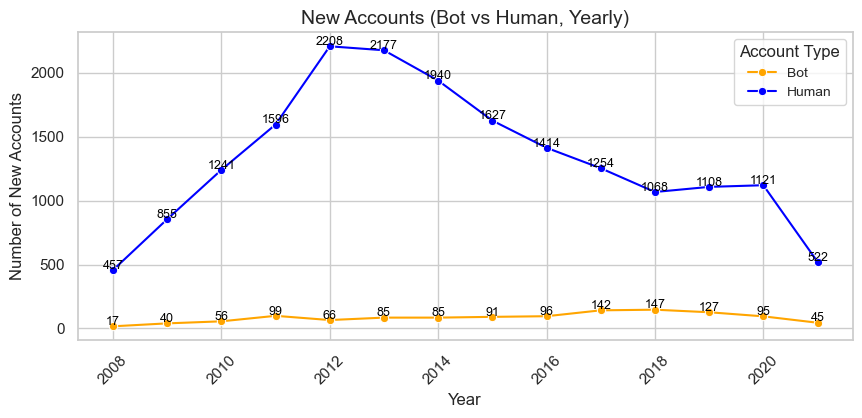

In [920]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data['year'] = data['created_at'].dt.year  # 提取年份

bot_counts = data[data['label'] == 'Bot'].groupby('year').size()
human_counts = data[data['label'] == 'Human'].groupby('year').size()

plt.figure(figsize=(10, 4))
sns.set(style='whitegrid')

sns.lineplot(x=bot_counts.index, y=bot_counts.values, label='Bot', color='orange', marker='o')
# 在每个点上添加数字
for x, y in zip(bot_counts.index, bot_counts.values):
    plt.text(x, y + 10, str(y), color='black', ha='center', fontsize=9)

sns.lineplot(x=human_counts.index, y=human_counts.values, label='Human', color='blue', marker='o')
# 在每个点上添加数字
for x, y in zip(human_counts.index, human_counts.values):
    plt.text(x, y + 10, str(y), color='black', ha='center', fontsize=9)
 
plt.title('New Accounts (Bot vs Human, Yearly)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of New Accounts', fontsize=12)
plt.legend(title='Account Type', fontsize=10)
plt.xticks(rotation=45)  

plt.show()


**选择`折线图`展示bot和human的情况**：它直观地反映Bot和Human两类账号每年的新增数量变化趋势，便于对比两类账号的数量变化，突出它们的差异和趋势。

每一年的Human账号的新增数量显著高于Bot账号，说明 Human用户是平台的主体。Bot账号的数量相对较少。
这说明GitHub上的开发者数量还是比这些自动化机器人账号多。

4. (2)可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

C:\Users\zzsyp\AppData\Local\Temp\ipykernel_2836\3287006921.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  bot_data['created_at'] = pd.to_datetime(bot_data['created_at']).dt.to_period('M')  # 将created_at转为日期格式


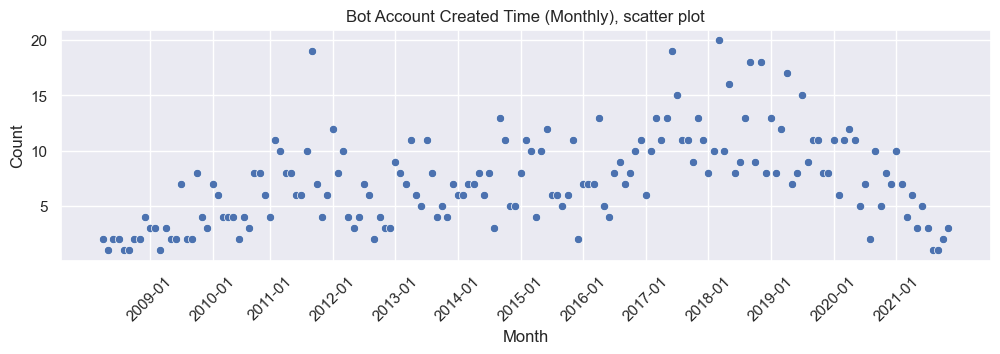

In [921]:
bot_data = data[data['label'] == 'Bot'].copy() # 筛选出bot类型的数据
bot_data['created_at'] = pd.to_datetime(bot_data['created_at']).dt.to_period('M')  # 将created_at转为日期格式
bot_data = bot_data['created_at'].value_counts().sort_index() # 按月份统计数量
plt.figure(figsize=(12,3))
sns.set(style='darkgrid')
sns.scatterplot(x=bot_data.index.astype(str), y=bot_data.values)  # 转换索引为字符串供绘图
x_ticks = [str(period) for period in bot_data.index if period.month == 1]  # 仅保留每年1月的刻度
plt.xticks(x_ticks, rotation=45)  # 设置 x 轴显示的刻度，仅显示年份
plt.title('Bot Account Created Time (Monthly), scatter plot')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


**我们选择使用`散点图`以`月`为单位对`created_at`数据进行可视化。**

**选择原因：**

（1）按月分析：

- 若以日为单位：虽然可以提供最细粒度的信息，但数据点过于密集，可能导致图表过于复杂且难以分析。此外，日常波动往往带有随机性，可能掩盖长期趋势，导致干扰解读。
- 若以年为单位：虽然能够显示长期趋势，但会损失大量的时间信息，年内月度变化无法体现，无法帮助我们发现更短周期内的变化规律。
- 按月为单位：能够兼顾细粒度和整体趋势。它既能呈现较为精细的数据分布，又能够避免数据过于密集，提升图表的可读性。

（2）散点图：

- 选择散点图，而非折线图，是因为创建时间是离散数据，用散点图更能体现这种离散性特点；此外，数据点较多，折线图可能会显得过于复杂，尤其当数据波动幅度较大时，线条可能显得杂乱。而散点图在这种情况下，仍然能清晰地展示数据分布。

**结果分析与数据洞察：**
- 在早期（2008-2012年），新机器人账号数量增长缓慢。这可能是因为GitHub刚刚创立，开发者对机器人工具的需求不高；
- 中期（2013-2018年）新机器人账号数量增长明显，在2018年前后达到高峰。这可能是因为17,18年是开源项目在GitHub的发展高峰，如推出GitHub Marketplace、被微软收购，触发了新的机器人工具创建。
- 后期（2019年后）新机器人账号数量下降，可能是因为GitHub加强了对机器人账户的管理，必须通过验证或认证，或因为有了其他替代工具。

4. (3)可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

C:\Users\zzsyp\AppData\Local\Temp\ipykernel_2836\1535236751.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  human_data['created_at'] = pd.to_datetime(human_data['created_at']).dt.to_period('M')  # 仅精确到月份


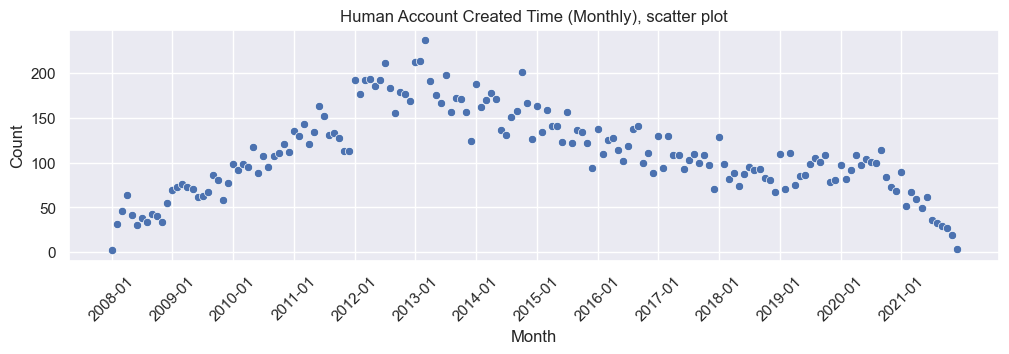

In [922]:
human_data = data[data['label'] == 'Human'].copy()
human_data['created_at'] = pd.to_datetime(human_data['created_at']).dt.to_period('M')  # 仅精确到月份
human_data = human_data['created_at'].value_counts().sort_index()  # 按月份统计数量
plt.figure(figsize=(12, 3))
sns.set(style='darkgrid')
sns.scatterplot(x=human_data.index.astype(str), y=human_data.values)  # 转换索引为字符串供绘图
x_ticks = [str(period) for period in human_data.index if period.month == 1]  # 仅保留每年1月的刻度
plt.xticks(x_ticks, rotation=45)  # 设置 x 轴显示的刻度，仅显示年份
plt.title('Human Account Created Time (Monthly), scatter plot')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

**仍选择选择使用`散点图`以`月`为单位对`created_at`数据进行可视化。**
**选择原因：**
- 同4.(3)。

**结果分析与数据洞察：** 总体上呈先增后减的趋势。
- 早期阶段（2008-2012年）：新真人用户数量逐步增长。
    - 2008-2010年，新用户数量较少且增长缓慢。原因可能是GitHub作为一个新兴平台，还未被广泛接受；
    - 2010-2012年，用户数量开始呈明显增长趋势。这可能与GitHub在技术社区中的逐渐普及有关，尤其是早期的项目托管功能逐渐被认可。
- 中期阶段（2013-2015年）：新真人用户达到峰值
    - 2013-2015年，新用户注册数量达到峰值。这可能是开源文化的推动使更多开发者加入GitHub。企业用户的加入和大量开源项目的涌入，也可能导致这一增长。
- 后期阶段（2016-2021年）：新用户注册逐渐下降
    - 从2016年开始，新用户注册数量逐渐减少。这可能是因为平台用户逐渐趋于饱和，新增用户数量开始放缓。
    - 2021年新真人用户达到低估，可能是数据未统计，或由于疫情影响。

4. (4)可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

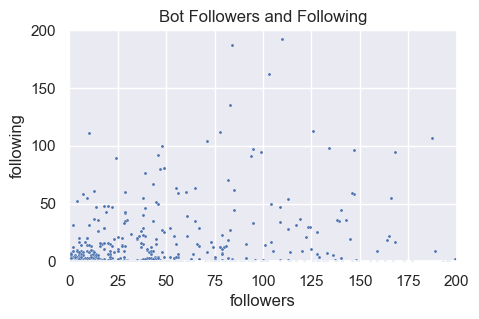

In [923]:
#4. (4)可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
bot_data = data[data['label'] == 'Bot'].copy()
bot_data = bot_data[['followers', 'following']]
plt.figure(figsize=(5,3))
sns.scatterplot(x='followers', y='following', data=bot_data, s = 5)
plt.title('Bot Followers and Following')
# 设置x轴y轴的范围
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.show()


**我们选择使用`散点图`来可视化Bot类型账号的followers和following：**

**选择原因：**
- 散点图可以直观地展示followers和following之间的关系，帮助我们观察二者之间的关联：每个点代表一个账号，点的位置清晰地体现了其followers和following的数量。
- 散点图可以直观地展示数据点的分布情况，包括密集区域和稀疏区域。
- 散点图可以可视化密度，观察followers和following的密度分布可以帮助理解这些账号的特性。

**结果分析与数据洞察**：
- 大多数Bot账号的followers和following都集中在较低的范围（如 0-50）。这可能是因为许多 Bot 账号主要用作工具或自动化任务，而不是用来增加互动或吸引用户。
- 少量账号有较高的followers或following：少部分Bot账号的followers数量较高，可能是因为这些账号很实用，吸引很多人关注。

4. (5) 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

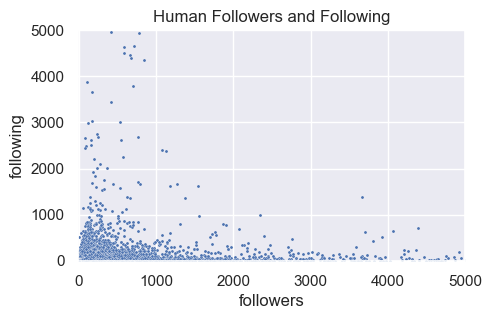

In [924]:
#4. (4)可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
human_data = data[data['label'] == 'Human'].copy()
human_data = human_data[['followers', 'following']]
plt.figure(figsize=(5,3))
sns.scatterplot(x='followers', y='following', data=human_data, s = 5)
plt.title('Human Followers and Following')
# 设置x轴y轴的范围
plt.xlim(-10, 5000)
plt.ylim(-10, 5000)
plt.show()


**我们选择使用`散点图`来可视化Human类型账号的followers和following：**

**选择原因：**

同4.(4)。

**结果分析与数据洞察**：
- 大部分真人账号的followers和following都集中在较低范围内：followers数量小于1000，following数量也大多低于1000。这说明多数真人用户都是未被大规模关注的。
- 有一些followers和/或following数值特别高的账号，这些账号可能是名人、组织或在社区中拥有较大影响力的用户。
- followers和following并没有明显的线性相关性。